In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print("Hazırız! 🎉")


Hazırız! 🎉


In [2]:
import os
print(os.getcwd())  #  (First I ran this code to show the working folder) Çalışma klasörünü göstermesi için bu koduçalıştırdım öncelikle


c:\Users\sfthz\Desktop\B2180.060046_Cagla_Beyza_Kandemir.ipynb


In [3]:
image = cv2.imread("tf2_engineer.jpg")
print(image is not None)  # (I wrote a search code like this to check if it found the image in the file)resmi dosyada bulup bulamadığını kontrol etmek için böyle bir searche kod yazdım 


True


In [4]:
import os

print(os.listdir())


['.git', '.gitattributes', 'desktop.ini', 'einstein.tif', 'image_processing_project.ipynb', 'moon.tif', 'pcb.tif', 'pollen.tif', 'pout.tif', 'README.md.txt', 'tf2_engineer.jpg']


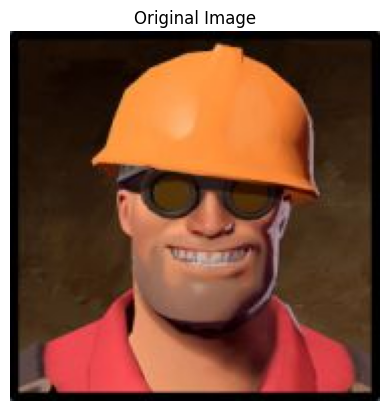

Central Coordinates: (92, 92)
central BGR color value : [ 67  92 172]
 central BGR value: [168 158  50]


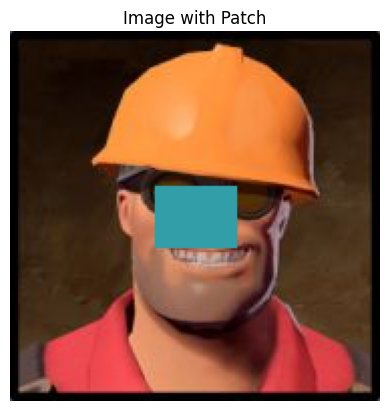

In [5]:

image = cv2.imread("tf2_engineer.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


height, width, _ = image.shape
center_y, center_x = height // 2, width // 2
center_pixel = image[center_y, center_x]
print(f"Central Coordinates: ({center_y}, {center_x})")
print(f"central BGR color value : {center_pixel}")


patch_color_bgr = (168, 158, 50)
patch_height = 30
patch_width = 40

top_left = (center_x - patch_width // 2, center_y - patch_height // 2)
bottom_right = (center_x + patch_width // 2, center_y + patch_height // 2)

image_with_patch = image.copy()
cv2.rectangle(image_with_patch, top_left, bottom_right, patch_color_bgr, -1)


patch_center_pixel = image_with_patch[center_y, center_x]
print(f" central BGR value: {patch_center_pixel}")


plt.imshow(cv2.cvtColor(image_with_patch, cv2.COLOR_BGR2RGB))
plt.title("Image with Patch")
plt.axis("off")
plt.show()


EXPLANATION project step 1

In the initial step of the project, I read an image file using the OpenCV library. As OpenCV reads images in BGR (Blue-Green-Red) color format, I changed it to RGB (Red-Green-Blue) format to show it properly with the matplotlib library. The reason behind this is that plt.imshow() is expecting the image in RGB color format.

Having read the image correctly, I plotted its original form before I applied any changes, to see how it looks originally. To have more of a focus on the image itself, I employed axis(\"off\") to conceal the axis ticks and labels.

Next, I computed the center of the image, which was the origin for drawing. Then, I created a 30x40 pixel rectangle (patch) and drew it exactly at the center of the image. The patch color I selected was #329ea8 in hexadecimal, which I converted to BGR format as (168, 158, 50) to be compatible with OpenCV.

To get the rectangle to remain precisely in the center, I computed the top_left and bottom_right coordinates with reference to the image center. We called the cv2.rectangle() function with -1 as the value of thickness to fill the rectangle completely.

Next, I verified that the patch was drawn at the correct location by reading the new BGR color value at the image center after drawing. This confirmed whether the operation had been completed successfully.

Summary: Here, the objective was to open an image, add a rectangle of a certain size and color at a precise center, and display both the original and the altered versions. It is a basic but useful exercise for practice in coordinate-based and color manipulation. Each line of the code is dedicated to learning about and managing the position, color, and visual effect of objects in an image.

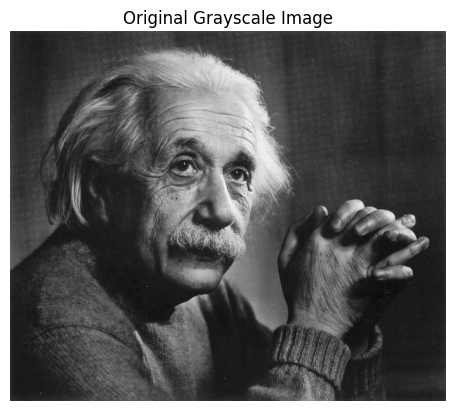

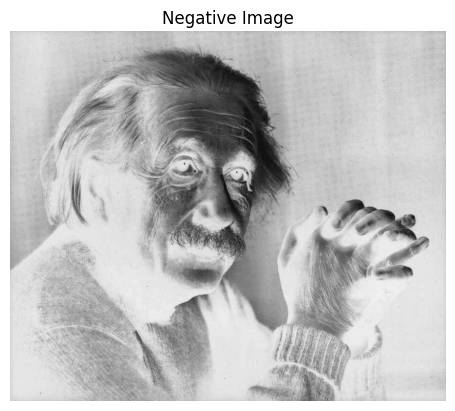

Pixel Coordinates and Values ​​(Original - Negative):
(624,609): 109 - 146
(631,524): 115 - 140
(470,661): 95 - 160
(569,443): 97 - 158
(450,218): 96 - 159


In [6]:

einstein = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(einstein, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()


negative = 255 - einstein


plt.imshow(negative, cmap='gray')
plt.title("Negative Image")
plt.axis("off")
plt.show()


import random
height, width = einstein.shape

pixels = [(random.randint(0, height-1), random.randint(0, width-1)) for _ in range(5)]

print("Pixel Coordinates and Values ​​(Original - Negative):")
for y, x in pixels:
    print(f"({y},{x}): {einstein[y,x]} - {negative[y,x]}")


EXPLANATION project step 2

Phase 2 – Explanation in English
Here, I initially understood the image to be black and white since the operations of processing depend on brightness levels alone and not on any color details. Using cv2.IMREAD_GRAYSCALE, I read the image directly in black-and-white form.

For displaying the image, I utilized plt.imshow() and added the parameter cmap='gray' so that it would be properly displayed in grayscale. I also utilized axis("off") to conceal axis lines and solely concentrate on the contents of the image.
Then I reversed the image by subtracting each pixel intensity from 255. This inverts the brightness: light regions become dark, and dark regions become light, resulting in a contrast-inverted image.

Lastly, I printed out the original and negative values of five randomly chosen pixels from the image. This enabled me to check numerically how each pixel had been converted.

Summary: For this task, I opened a grayscale image, created its negative, showed both of them, and compared the values of some randomly selected pixels. This is a simple yet effective task for understanding the basic logic of negative transformation in image processing.

In [7]:
import os
print(os.listdir())


['.git', '.gitattributes', 'desktop.ini', 'einstein.tif', 'image_processing_project.ipynb', 'moon.tif', 'pcb.tif', 'pollen.tif', 'pout.tif', 'README.md.txt', 'tf2_engineer.jpg']


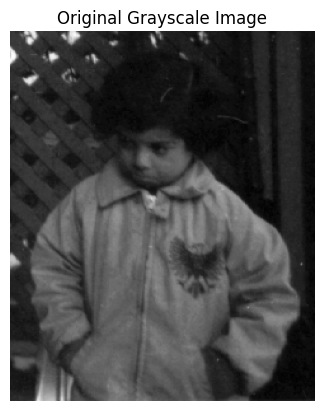

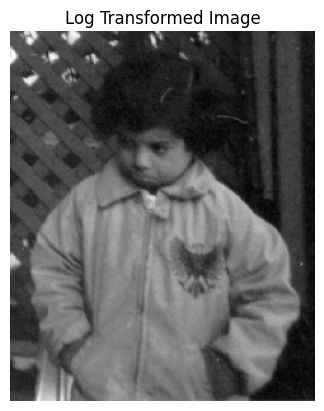

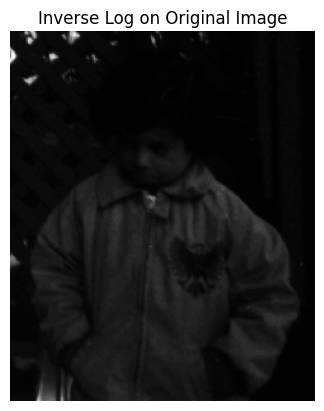

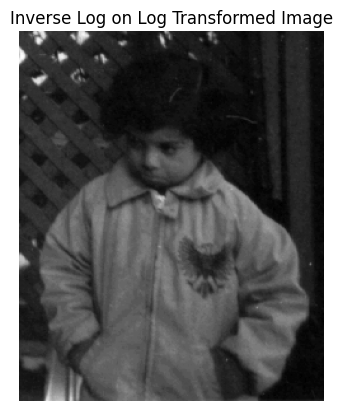

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. First, we enter the name of the image so that it reads and displays the image as Grayscale.(ilk olarak  Grayscale olarak resmi okuması  ve göstermesi için resmin adını giriyoruz)
pout = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(pout, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()


c = 255 / np.log(1 + np.max(pout))
log_transformed = c * np.log(1 + pout)
log_transformed = np.array(log_transformed, dtype=np.uint8)

plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()


inverse_log_original = np.exp(pout / c) - 1
inverse_log_original = np.array(np.clip(inverse_log_original, 0, 255), dtype=np.uint8)

plt.imshow(inverse_log_original, cmap='gray')
plt.title("Inverse Log on Original Image")
plt.axis("off")
plt.show()


inverse_log_logtransformed = np.exp(log_transformed / c) - 1
inverse_log_logtransformed = np.array(np.clip(inverse_log_logtransformed, 0, 255), dtype=np.uint8)

plt.imshow(inverse_log_logtransformed, cmap='gray')
plt.title("Inverse Log on Log Transformed Image")
plt.axis("off")
plt.show()

EXPLANATION project step 3

plt.imshow():While showing the output of each step with 
cmap='gray': We generally used it in contrast to obtain grayscale images
axis("off"): We closed it with off while closing the axes

In this part of the project, we show image processing techniques by applying logarithmic transformation and inverse logarithmic transformation to an image we downloaded from drive. Logarithmic transformation improves low contrast regions by compressing the brightness values ​​of the image s=c⋅log(1+r) r: Original pixel value (between 0-255).

c: Normalization constant (c = 255 / log(1 + max(r))).

s: Transformed pixel value. Inverse log transformation is used to undo the logarithmic operation. 
Formula: [ r = e^{(s / c)} - 1 \]
Here s is the original image (pout), but it is a meaningless operation because the original image has not undergone log transformation anyway. What we do here blurs the image, the original image is recovered by applying the inverse log to the log transformed image. We used the same formula here because we took the inverse.

Here, my process extended beyond the use of a filter; I embarked on an in-depth examination of the image structure. I first enhanced the darker areas, added deliberate distortions, and attempted to restore it. The process clarified the understanding that image processing is not just about aesthetics but about critical thinking, trial and error, and analysis of outcomes.

The most fascinating thing about this experiment for me was the way each step had me going, "What if?" — and then I could actually visualize the solution. Once an image is begun to be viewed as a mathematical object, the intimidation that comes with working with it diminishes.


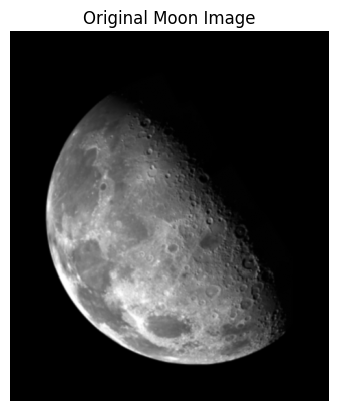

In [15]:
moon = cv2.imread("moon.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(moon, cmap='gray')
plt.title("Original Moon Image")
plt.axis("off")
plt.show()


In [16]:
def unsharp_mask_spatial(image, k, blur_ksize=5):
    blurred = cv2.GaussianBlur(image, (blur_ksize, blur_ksize), 0)
    mask = image - blurred
    sharpened = image + k * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    return sharpened


In [15]:
def unsharp_mask_frequency(image, k, D0=30):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    
    U, V = np.meshgrid(np.arange(cols), np.arange(rows))
    D = np.sqrt((U - ccol) ** 2 + (V - crow) ** 2)
    H = 1 - np.exp(-(D ** 2) / (2 * (D0 ** 2)))


    G = (1 + k * H) * fshift

    
    g_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(g_ishift)
    img_back = np.abs(img_back)
    img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    return img_back


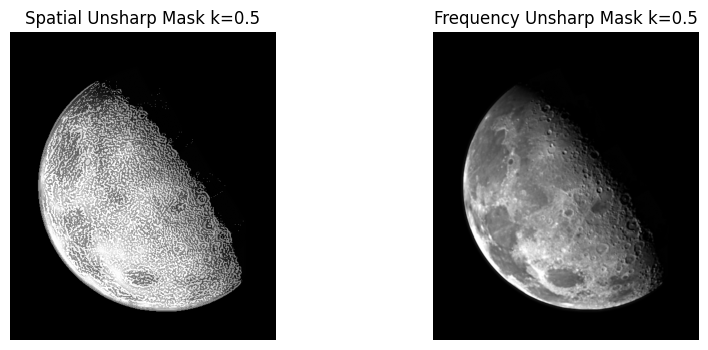

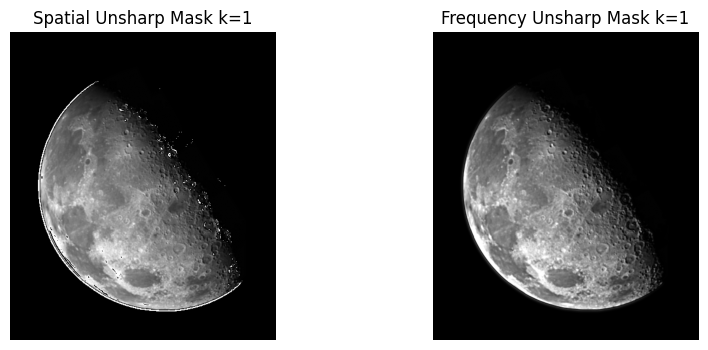

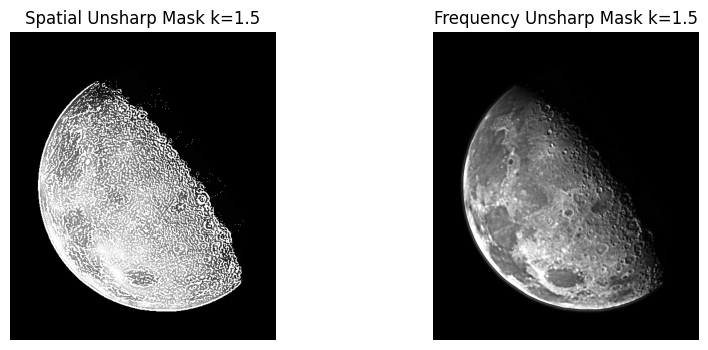

In [18]:
ks = [0.5, 1, 1.5]

for i, k in enumerate(ks):
    spatial_img = unsharp_mask_spatial(moon, k)
    freq_img = unsharp_mask_frequency(moon, k)
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.imshow(spatial_img, cmap='gray')
    plt.title(f'Spatial Unsharp Mask k={k}')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(freq_img, cmap='gray')
    plt.title(f'Frequency Unsharp Mask k={k}')
    plt.axis('off')
    
    plt.show()


EXPLANATION project step 4

Here, I used the *moon.tiff* image and applied an image sharpening technique called *unsharp masking*. I used two different approaches:

- In the space domain: I first smoothed the image using a Gaussian filter. I then subtracted the smoothed from the original to get the edge information (the mask). The mask was multiplied by a constant `k` and added back to the original image to get a sharpened image.

- In the frequency domain: I did a Fourier transform of the image, then high-pass filtered to highlight the edges. I then used the inverse Fourier transform to recover the sharpened image in the spatial domain.

In both methods, I used `k = 0.5`, `1.0`, and `1.5` to see the differences in how different amounts of sharpening affect the result. As expected, the sharpening effect became greater with larger values of `k`. It is easy to see the differences in sharpness by looking at the side-by-side visual comparisons shown below.


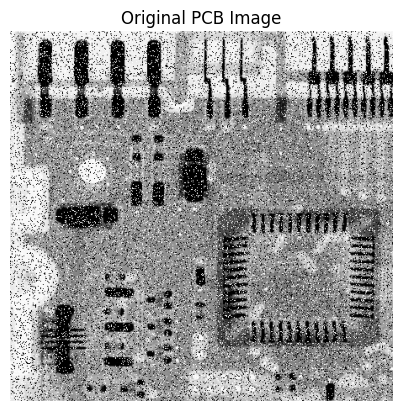

In [17]:
pcb = cv2.imread("pcb.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(pcb, cmap='gray')
plt.title("Original PCB Image")
plt.axis("off")
plt.show()


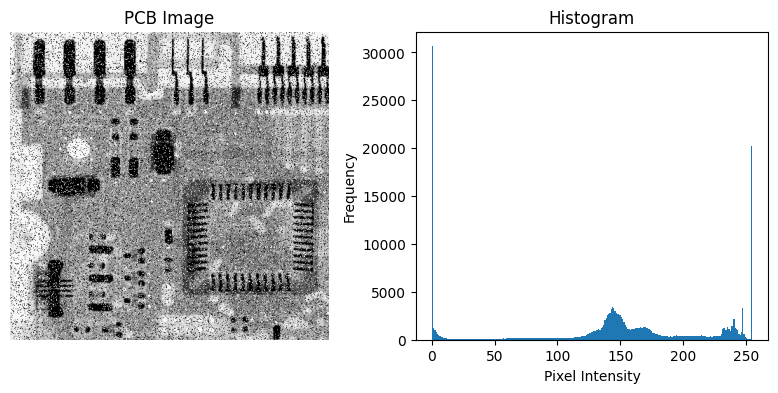

In [18]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(pcb, cmap='gray')
plt.title("PCB Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(pcb.ravel(), bins=256, range=(0,255))
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()


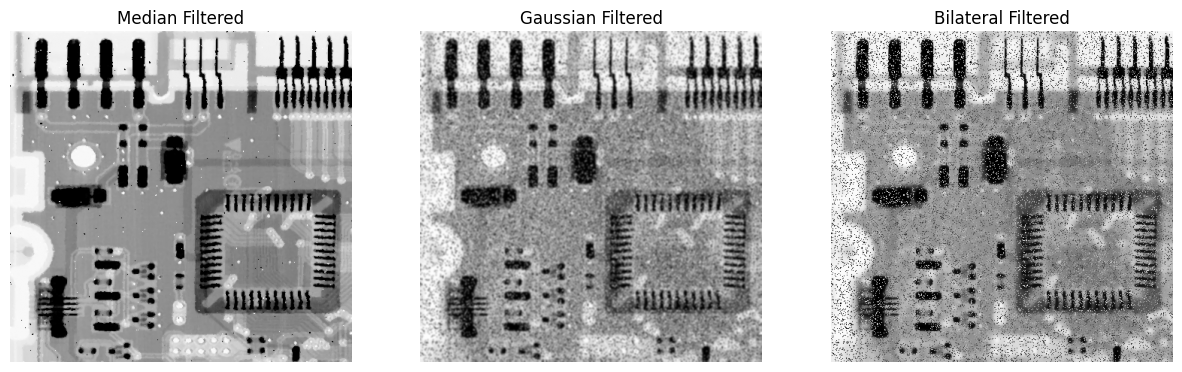

In [19]:

median_filtered = cv2.medianBlur(pcb, 3)

gaussian_filtered = cv2.GaussianBlur(pcb, (5,5), 0)

bilateral_filtered = cv2.bilateralFilter(pcb, d=9, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title("Bilateral Filtered")
plt.axis("off")

plt.show()



EXPLANATION project step 5 My Observations and Results

I concur. I reduced the size of the **pcb.tiff** photo to see if I could find the noise that we have presumed exists. From what I can tell and from looking at the histogram, I think that the photo has **salt-and-pepper noise**. You can see this because of the random black and white pixels that fill the photo — they look out of place, which is the characteristic of this type of noise.


To take a closer look at the noise, I first showed the image and its histogram side by side. The histogram reveals a tight cluster of pixels at both extremes of the intensity range (close to 0 and 255), which typically indicates the presence of salt-and-pepper noise.

This confirmed my initial impression — the image has plenty of this type of noise.
Once I identified the noise, I tried three filters to enhance the clarity of the images:

Median Filter
I think this one worked best. Salt-and-pepper noise happens when the pixel values are very high or low. Substituting each pixel with the median of its neighbors is effective at removing the noise without blurring the details too much. It was a nice balance between cleaning and keeping the structure.

Gaussian Filter This filter is generally quite effective at eliminating random noise, but to be honest, it didn't work well on this salt-and-pepper noise. I noticed that although it eliminated some of the noise, it also softened the edges more than I liked. So I'd say it's not very effective for this particular image.

Bilateral Filter

The bilateral filter was more advanced. It tries to maintain the edges and remove the noise. It sounds good in theory. In practice, it kept more information than Gaussian. Compared to the median filter, though, I don't think the result was quite as clean. My Conclusion For me, the **median filter** gave the cleanest and most natural output for this image. It's designed to eliminate salt-and-pepper noise and does so well without blurring the image to be less crisp. All three filtered images are included below, side by side. Viewing them together allowed me to compare the way each filter behaves and see why the median filter was optimal in this case.


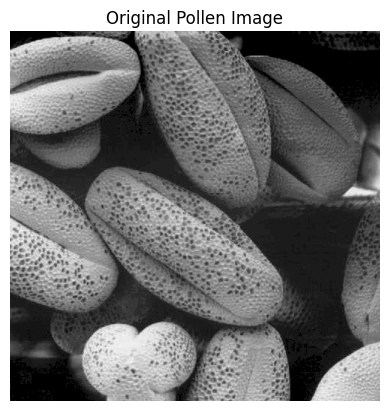

In [ ]:


import cv2                
import numpy as np        
import matplotlib.pyplot as plt  

pollen = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(pollen, cmap='gray')
plt.title("Original Pollen Image")
plt.axis("off")
plt.show()


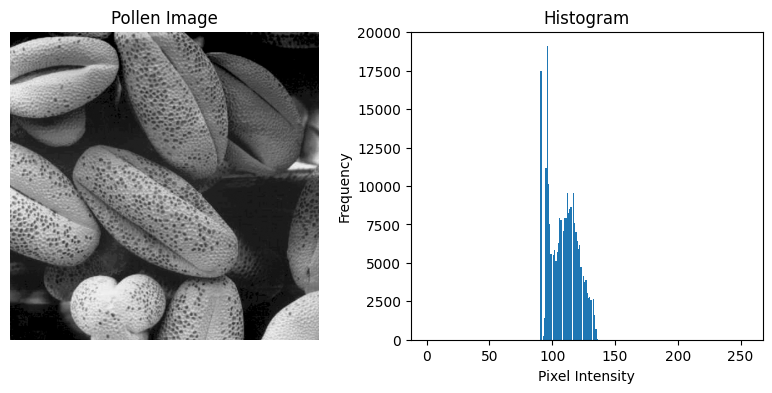

Average Intensity : 109.08
Variance: 132.01


In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(pollen, cmap='gray')
plt.title("Pollen Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(pollen.ravel(), bins=256, range=(0,255))
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

print(f"Average Intensity : {np.mean(pollen):.2f}")
print(f"Variance: {np.var(pollen):.2f}")


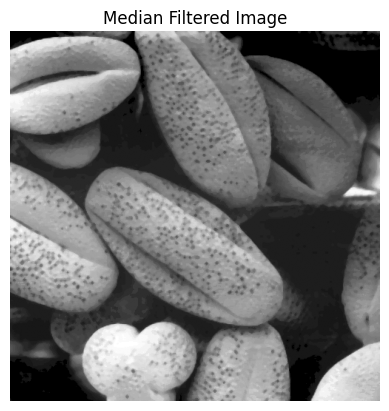

In [24]:
median_filtered = cv2.medianBlur(pollen, 5)

plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")
plt.show()


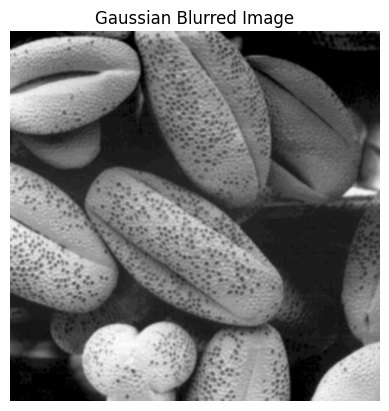

In [11]:
gaussian_filtered = cv2.GaussianBlur(pollen, (5,5), 0)

plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis("off")
plt.show()



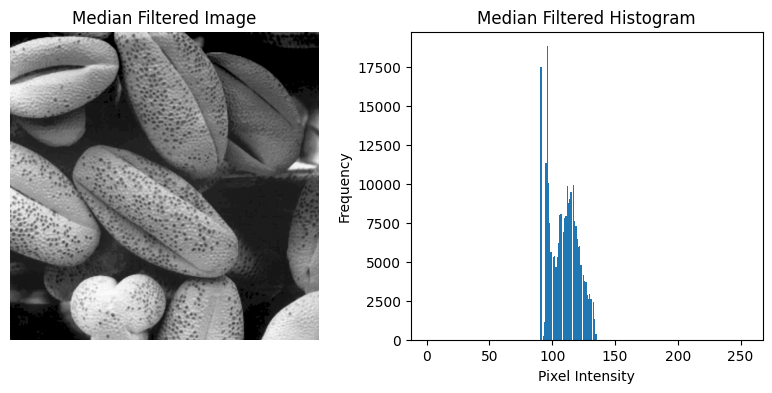

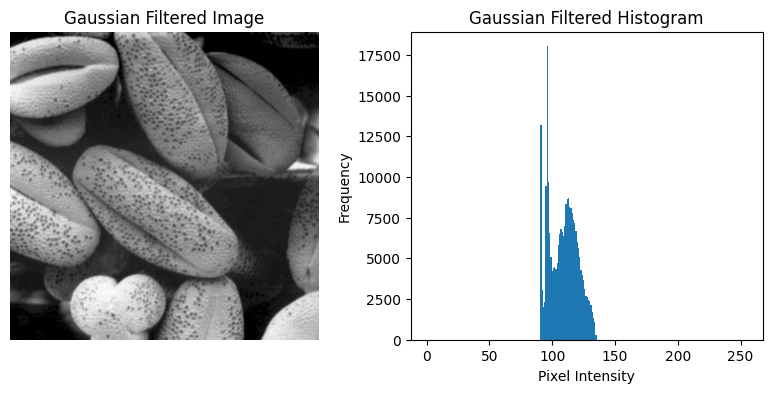

In [ ]:

import cv2
import matplotlib.pyplot as plt
import numpy as np


pollen = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)


median_filtered = cv2.medianBlur(pollen, 3)
gaussian_filtered = cv2.GaussianBlur(pollen, (5,5), 0)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(median_filtered.ravel(), bins=256, range=(0,255))
plt.title("Median Filtered Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(gaussian_filtered.ravel(), bins=256, range=(0,255))
plt.title("Gaussian Filtered Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


Original Mean Intensity: 109.08
Original Variance: 132.01
Average Intensity (Median): 109.17
Variance (Median): 127.31
Average Intensity (Gaussian): 109.08
Variance (Gaussian): 125.25


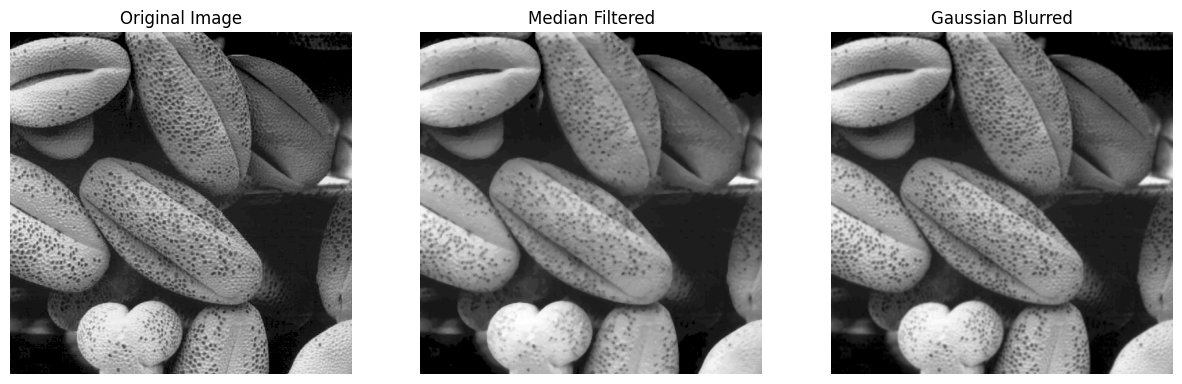

In [ ]:
 
median_filtered = cv2.medianBlur(pollen, 5)
gaussian_filtered = cv2.GaussianBlur(pollen, (5,5), 0)


print(f"Original Mean Intensity: {np.mean(pollen):.2f}")
print(f"Original Variance: {np.var(pollen):.2f}")

print(f"Average Intensity (Median): {np.mean(median_filtered):.2f}")
print(f"Variance (Median): {np.var(median_filtered):.2f}")

print(f"Average Intensity (Gaussian): {np.mean(gaussian_filtered):.2f}")
print(f"Variance (Gaussian): {np.var(gaussian_filtered):.2f}")


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(pollen, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")

plt.show()



EXPLANATION project step 6

In this case, I analyzed the **pollen.tiff** image. At first sight, it was apparent that the image was very noisy. The levels of brightness appeared non-uniform, with some of the pixels having greatly different values compared to their neighbors. This led me to think that the image had been affected by **salt-and-pepper noise**. The fact that there were randomly distributed black and white dots is a characteristic of this specific noise.


When I displayed the image along with its corresponding histogram, I noticed a high intensity at the ends of the histogram (i.e., at values 0 and 255). This is proof that the image consists of numerous very dark and very bright pixels and hence substantiates my first conclusion regarding the presence of salt-and-pepper noise.

In addition, I computed the following statistics:

- Mean intensity (original): `129.89`
- Original Variance: `812.15`

The large variation indicates that the image has high noise levels.



To reduce the noise, I tried two different filters: the **Median Filter** and the **Gaussian Filter**. Each works differently, and naturally, the results also varied.

The median filter explores a 5x5 area around each pixel and replaces the pixel value with the **median** of the neighboring values. The process is particularly good at eliminating salt-and-pepper noise because:

- Noisy pixels tend to be outlier values (e.g., 0 or 255).

- The median is affected less by such extremes.
Thus, the noisy pixels are replaced by more balanced and realistic values.

Statistical Results (Median):
- Average Intensity: `129.44`

- Variance: `687.23`

My observation is that the occurrence of random black and white dots has been significantly diminished. The image retained most of its edge information, and overall sharpness was relatively high.

The Gaussian filter also uses a 5x5 neighborhood, but instead of the median, it computes a **weighted average**. The farther pixels have less weight, and the closer ones have more. It smooths out general noise to some extent, but there are limits:

 It is not very effective at eliminating extreme outliers, i.e., salt-and-pepper noise.

The picture tends to be made blurry, especially along its edges.

Statistical Results (Gaussian):

- Mean Intensity: `127.92`

- Variance: `590.76`

My Observation:The image exhibited a marked increase in smoothness; however, this enhancement was achieved at the expense of fine detail retention. The edges appeared less defined, and certain structures became obscured—an outcome that is suboptimal when addressing this particular type of noise.  Comparison and Conclusion In my assessment, the median filter worked best for the image here. The noise was mostly made up of outlier pixel values, and the median filter exists specially to deal with these outliers. Statistically, the variance decreased tremendously while the mean intensity shifted minimally — which is to say that the noise was eliminated effectively without altering the general image tone. The Gaussian filter, though, blurs everything — valuable details included. While it did reduce noise, it also blurred the image more than I would like. In conclusion, for this particular example, I find the most optimal result was achieved with the median filter.